In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will be solving the 2D advection equation using interpolating SL methods under periodic boundary conditions. 

In [31]:
# Parameters
N = 101 # Number of grid points in each direction
v = [1.65, 2.56] # Velocity in x and y directions
dt = 1 # Time step size
T = 200 # Number of timesteps

In [32]:
# grid to store states for each timestep
grid = np.zeros((T, N, N))

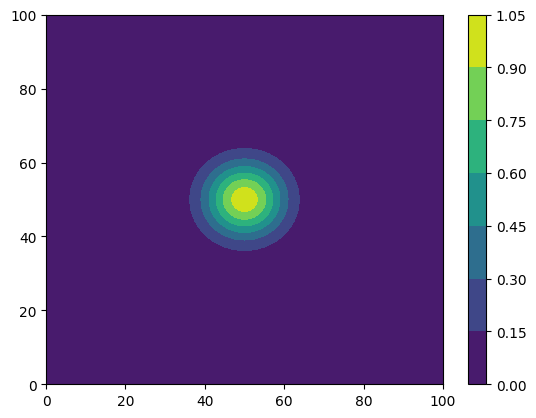

In [33]:
# initial condtions
x = np.linspace(-(N-1)//2, (N-1)//2, N)
y = np.linspace(-(N-1)//2, (N-1)//2, N)
x_grid, y_grid = np.meshgrid(x, y)

grid[0, :, :] = np.exp(-((x_grid/10)**2 + (y_grid/10)**2))
grid[1, :, :] = np.exp(-(((x_grid-v[0]*dt)/10)**2 + ((y_grid-v[1]*dt)/10)**2))

cp = plt.contourf(grid[0, :, :])
plt.colorbar(cp)
plt.show()

In [34]:
# Starting point problem solver, gives us the value of x backtracing for dt timesteps, aka alpha
def starting_point(v, dt):
    return float(v*dt)

# Interpolator Weights, tells the relative weigths of the two points to interpolate between
def interp_weights(alpha):
    frac_pos = 2*alpha - np.floor(2*alpha)
    return [(1 - frac_pos[0])*(1 - frac_pos[1]),
            frac_pos[1]*(1 - frac_pos[0]), 
            frac_pos[0]*(1 - frac_pos[1]), 
            frac_pos[0]*frac_pos[1]]

# Semi-Lagrangian interpolation, gives us the value of x at the starting point for the next timestep
def semi_lagrange_interp(grid_array, alpha, T):
    if (2*alpha[0]).is_integer() and (2*alpha[1]).is_integer():
        for t in range(1, T-1):
            grid_array[t + 1, :, :] = np.roll(np.roll(grid_array[t - 1, :, :], 
                                                         shift=int(2*alpha[0]), axis=1), shift=int(2*alpha[1]), axis=0)
    else:
        shift_arr = [np.floor(2*alpha[0]), np.floor(2*alpha[1])]
        weights = interp_weights(alpha)
        for t in range(1, T-1):
            temp_mat = np.roll(np.roll(grid_array[t - 1, :, :], shift=int(shift_arr[0]), axis=1), shift=int(shift_arr[1]), axis=0)
            grid_array[t + 1, :] = weights[0]*temp_mat[:, :] + weights[1]*np.roll(temp_mat[:, :], 1, axis = 1) + weights[2]*np.roll(temp_mat[:, :], 1, axis = 0) + weights[3]*np.roll(np.roll(temp_mat[:, :], 1, axis = 0), 1, axis = 1)

In [35]:
alpha_0 = [starting_point(v[0], dt), starting_point(v[1], dt)]
semi_lagrange_interp(grid, alpha_0, T)

# Velocity Test

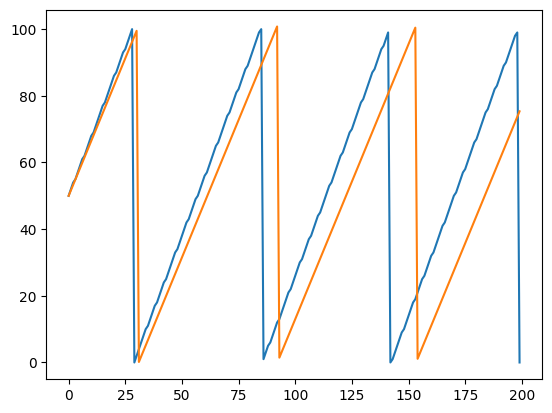

In [38]:
# x coordinate check
time = np.array([t for t in range(len(grid))])
x_centre = [np.argmax(grid[t, :, :])%N for t in range(len(grid))]
plt.plot(time, x_centre)
plt.plot(time, (50 + v[0]*time)%N)

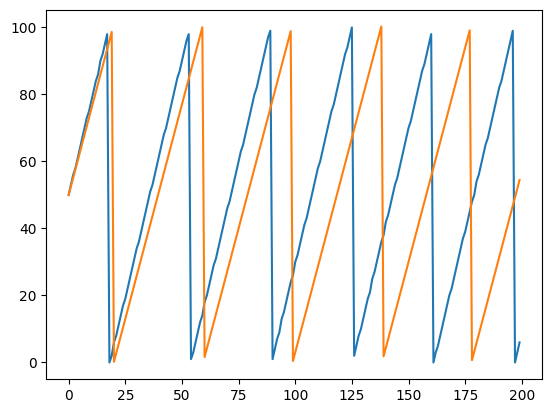

In [37]:
# y coordinate check
time = np.array([t for t in range(len(grid))])
y_centre = [np.argmax(grid[t, :, :])//N for t in range(len(grid))]
plt.plot(time, y_centre)
plt.plot(time, (50 + v[1]*time)%N)

In [7]:
from video_creator_2d import create_video

create_video(grid, '2d_interp_advec.mp4')

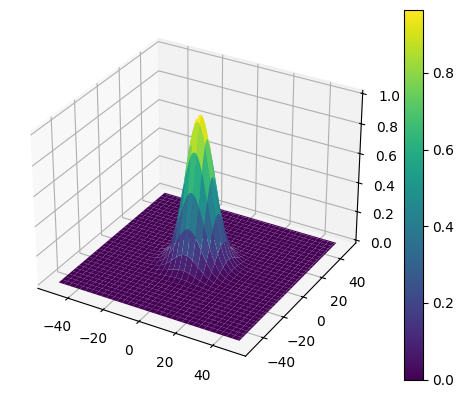

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-(N-1)//2, (N-1)//2, N)
y = np.linspace(-(N-1)//2, (N-1)//2, N)
x_grid, y_grid = np.meshgrid(x, y)
z = grid[0, :, :]  # The initial condition values as heights

# Plotting the surface
surf = ax.plot_surface(x_grid, y_grid, z, cmap='viridis')
plt.colorbar(surf)
plt.show()